In [2]:
import sys
import os

root_dir = os.path.abspath("/Users/ryant/Documents/Github/digital-asset-options-pricing")
if root_dir not in sys.path:
    sys.path.append(root_dir)
os.chdir(root_dir)

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Price

In [9]:
df_binance_btc = pd.read_parquet("/Users/ryant/Documents/Github/digital-asset-options-pricing/src/data/deribit/data/BINANCE_BTCUSDT_15m_010624_123124.parquet")
df_binance_btc
# df_binance_btc = pd.read_parquet('/Users/ryant/Documents/Github/digital-asset-options-pricing/src/data/deribit/data/BINANCE_BTCUSDT_spot_15m_011124_301124.parquet')
# df_bybit_btc = pd.read_parquet('/Users/ryant/Documents/Github/digital-asset-options-pricing/src/data/deribit/data/BYBIT_BTCUSDT_spot_15m_011124_301124.parquet')
# df_coinbase_btc = pd.read_parquet('/Users/ryant/Documents/Github/digital-asset-options-pricing/src/data/deribit/data/COINBASE_BTC-USDC_spot_15m_011124_301124.parquet')
# df_coinbase_btc.head(5)

,timestamp,open,high,low,close,volume
0,1.717200e+12,67540.01,67703.89,67540.00,67586.61,274.50877
1,1.717201e+12,67586.61,67586.61,67507.39,67559.73,82.60933
2,1.717202e+12,67559.73,67636.28,67552.00,67603.06,139.32988
3,1.717203e+12,67603.06,67689.64,67603.05,67655.66,73.42276
4,1.717204e+12,67655.66,67710.29,67600.00,67621.56,126.42777
...,...,...,...,...,...,...
28072,1.742465e+12,85877.28,85943.74,85542.60,85545.89,285.37794
28073,1.742466e+12,85545.89,85560.61,84755.14,85246.35,789.05468
28074,1.742467e+12,85246.35,85442.23,85113.39,85293.91,318.42225
28075,1.742468e+12,85293.90,85373.28,85163.04,85173.78,132.64061


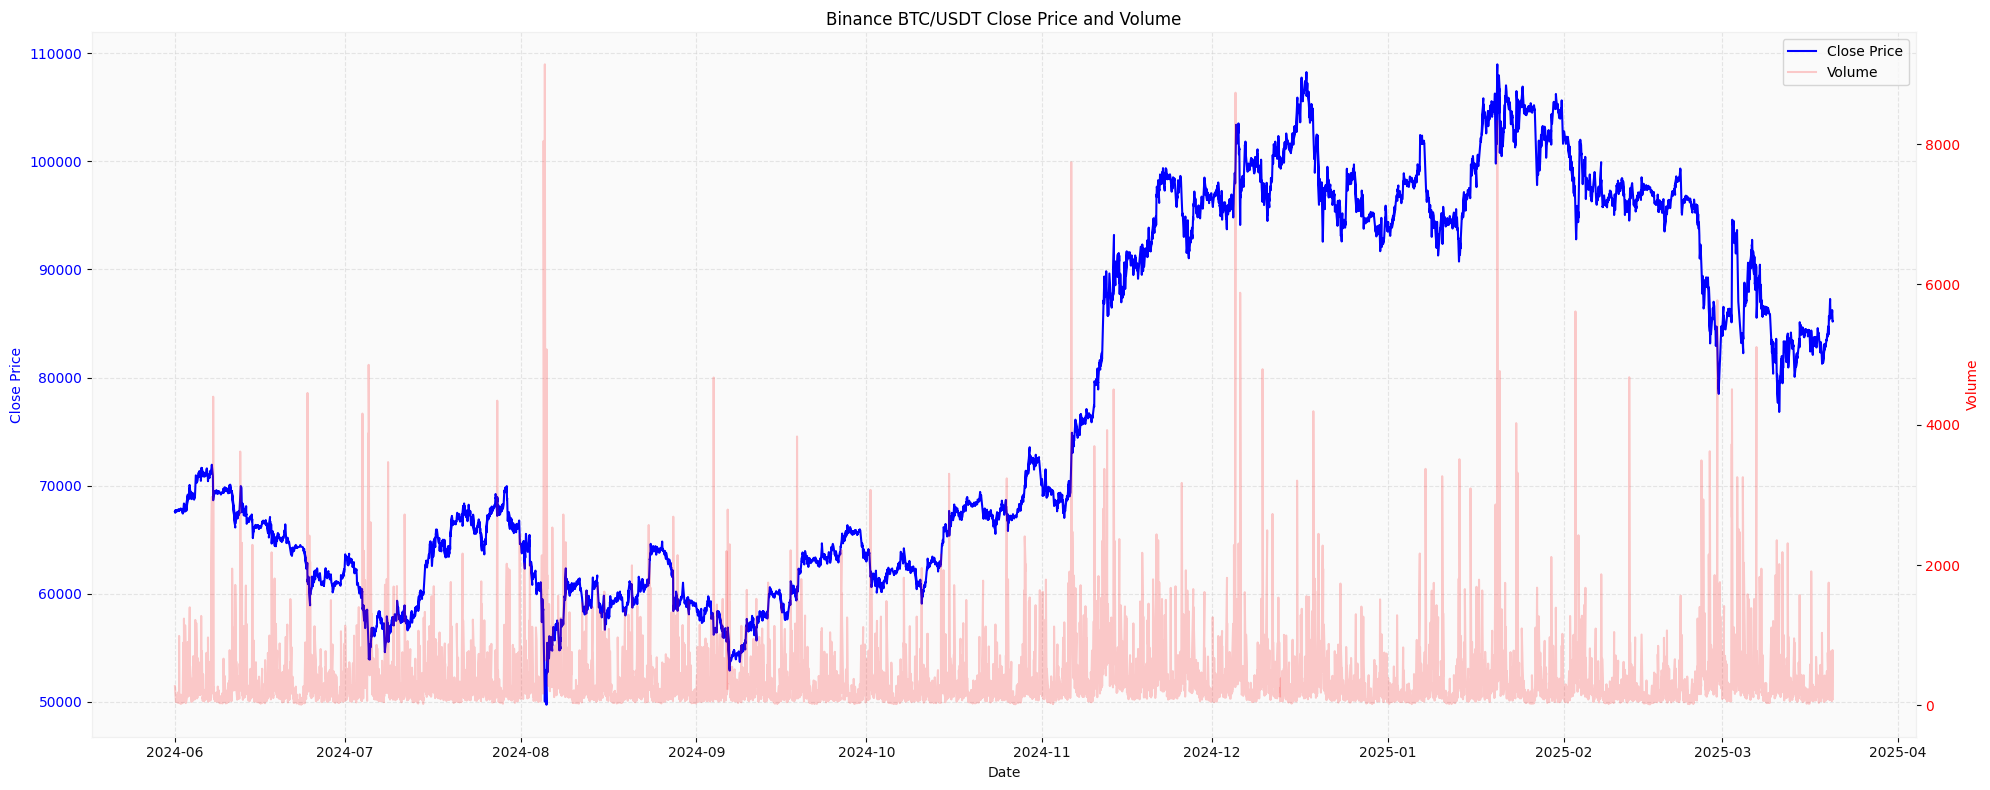

In [30]:
def dual_axis_plot(df, datetime_col, left_col, right_col, 
                  title='Dual Axis Plot', 
                  left_color='blue', right_color='red',
                  left_label=None, right_label=None,
                  figsize=(12, 6), grid=True, 
                  left_marker=None, right_marker=None,
                  left_linestyle='-', right_linestyle='-'):
    # Make a copy of the DataFrame
    df_plot = df.copy()
    
    # Ensure datetime column is a datetime type
    if not pd.api.types.is_datetime64_any_dtype(df_plot[datetime_col]):
        df_plot[datetime_col] = pd.to_datetime(df_plot[datetime_col], unit='ms')
    
    # Set default labels if not provided
    if left_label is None:
        left_label = left_col
    if right_label is None:
        right_label = right_col
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=figsize)
    
    # Plot data on left y-axis
    ax1.plot(df_plot[datetime_col], df_plot[left_col], color=left_color, 
             marker=left_marker, linestyle=left_linestyle, label=left_label)
    
    # Set left y-axis properties
    ax1.set_xlabel('Date')
    ax1.set_ylabel(left_label, color=left_color)
    ax1.tick_params(axis='y', labelcolor=left_color)

    # Create secondary y-axis and plot data
    ax2 = ax1.twinx()
    ax2.plot(df_plot[datetime_col], df_plot[right_col], color=right_color, 
             marker=right_marker, linestyle=right_linestyle, label=right_label, alpha = 0.2)
    
    # Set right y-axis properties
    ax2.set_ylabel(right_label, color=right_color)
    ax2.tick_params(axis='y', labelcolor=right_color)

    # Add grid if requested (only on the left axis to avoid visual clutter)
    if grid:
        ax1.grid(True, linestyle='--', alpha=0.5)
        ax2.grid(False)
    # Set title
    plt.title(title)
    
    # Add combined legend for both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
    
    # Rotate date labels for better readability
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

dual_axis_plot(df_binance_btc, 'timestamp', 'close', 'volume', title='Binance BTC/USDT Close Price and Volume', left_label='Close Price', right_label='Volume', left_color='blue', right_color='red', figsize=(20, 8))

In [33]:
df_binance_btc['returns'] = (df_binance_btc['open'] / df_binance_btc['open'].shift(1)) - 1
df_binance_btc['log_returns'] = np.log(df_binance_btc['open'] / df_binance_btc['open'].shift(1))
df_binance_btc

,timestamp,open,high,low,close,volume,returns,log_returns
0,1.717200e+12,67540.01,67703.89,67540.00,67586.61,274.50877,NaN,NaN
1,1.717201e+12,67586.61,67586.61,67507.39,67559.73,82.60933,0.000690,0.000690
2,1.717202e+12,67559.73,67636.28,67552.00,67603.06,139.32988,-0.000398,-0.000398
3,1.717203e+12,67603.06,67689.64,67603.05,67655.66,73.42276,0.000641,0.000641
4,1.717204e+12,67655.66,67710.29,67600.00,67621.56,126.42777,0.000778,0.000778
...,...,...,...,...,...,...,...,...
28072,1.742465e+12,85877.28,85943.74,85542.60,85545.89,285.37794,-0.001443,-0.001444
28073,1.742466e+12,85545.89,85560.61,84755.14,85246.35,789.05468,-0.003859,-0.003866
28074,1.742467e+12,85246.35,85442.23,85113.39,85293.91,318.42225,-0.003502,-0.003508
28075,1.742468e+12,85293.90,85373.28,85163.04,85173.78,132.64061,0.000558,0.000558


# 1 Realized Volatility Models
## 1. Models to Calculate Realized Volatility

**Simple Historical Volatility**
- Standard deviation of returns over a fixed period
- Typically calculated on logarithmic returns: σ = √[Σ(r_i - r̄)²/(n-1)]
- Usually annualized by multiplying by √(trading periods per year)

**Parkinson Volatility**
- Uses high-low price range: σ_p = √[1/(4n ln(2)) × Σ(ln(High_i/Low_i))²]
- More efficient estimator than close-to-close with the same amount of data

**Garman-Klass Volatility**
- Incorporates open, high, low, and close prices
- σ_gk = √[0.5 × (ln(High_i/Low_i))² - (2ln(2)-1) × (ln(Close_i/Open_i))²]

**Rogers-Satchell Volatility**
- Accounts for price drift: σ_rs = √[ln(High_i/Close_i) × ln(High_i/Open_i) + ln(Low_i/Close_i) × ln(Low_i/Open_i)]
- Works well when returns have a non-zero mean

In [96]:
import numpy as np
import pandas as pd

def simple_historical_volatility(df, window=20, scaling=np.sqrt(252), log_return_col='log_return'):
    """
    Calculate Simple Historical Volatility (Close-to-Close)
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with OHLCV data and log returns
    window : int, default 20
        Rolling window for volatility calculation (e.g., 20 days)
    scaling : float, default sqrt(252)
        Annualization factor (√252 for daily, √12 for monthly, √4 for quarterly)
    log_return_col : str, default 'log_return'
        Name of the column containing log returns
        
    Returns:
    --------
    pandas.Series
        Series with calculated simple historical volatility
    """
    # Standard deviation of log returns
    return df[log_return_col].rolling(window=window).std() * scaling


def parkinson_volatility(df, window=20, scaling=np.sqrt(252), high_col='high', low_col='low'):
    """
    Calculate Parkinson Volatility using high-low range
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with OHLCV data
    window : int, default 20
        Rolling window for volatility calculation (e.g., 20 days)
    scaling : float, default sqrt(252)
        Annualization factor
    high_col : str, default 'high'
        Name of the high price column
    low_col : str, default 'low'
        Name of the low price column
        
    Returns:
    --------
    pandas.Series
        Series with calculated Parkinson volatility
    """
    # Formula: σ_p = sqrt(1/(4*ln(2)) * sum[(ln(high/low))^2] / n)
    high_low_ratio = df[high_col] / df[low_col]
    log_high_low = np.log(high_low_ratio)
    
    return np.sqrt(
        1.0 / (4.0 * np.log(2.0)) * 
        log_high_low.pow(2).rolling(window=window).mean()
    ) * scaling


def garman_klass_volatility(df, window=20, scaling=np.sqrt(252), 
                            high_col='high', low_col='low', 
                            open_col='open', close_col='close'):
    """
    Calculate Garman-Klass Volatility
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with OHLCV data
    window : int, default 20
        Rolling window for volatility calculation (e.g., 20 days)
    scaling : float, default sqrt(252)
        Annualization factor
    high_col, low_col, open_col, close_col : str
        Names of the respective price columns
        
    Returns:
    --------
    pandas.Series
        Series with calculated Garman-Klass volatility
    """
    # Formula: σ_gk = sqrt(0.5 * [ln(high/low)]^2 - (2*ln(2)-1) * [ln(close/open)]^2)
    high_low = np.log(df[high_col] / df[low_col]).pow(2)
    close_open = np.log(df[close_col] / df[open_col]).pow(2)
    
    return np.sqrt(
        (0.5 * high_low - (2 * np.log(2) - 1) * close_open).rolling(window=window).mean()
    ) * scaling


def rogers_satchell_volatility(df, window=20, scaling=np.sqrt(252),
                               high_col='high', low_col='low', 
                               open_col='open', close_col='close'):
    """
    Calculate Rogers-Satchell Volatility
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with OHLCV data
    window : int, default 20
        Rolling window for volatility calculation (e.g., 20 days)
    scaling : float, default sqrt(252)
        Annualization factor
    high_col, low_col, open_col, close_col : str
        Names of the respective price columns
        
    Returns:
    --------
    pandas.Series
        Series with calculated Rogers-Satchell volatility
    """
    # Formula: σ_rs = sqrt(ln(high/close) * ln(high/open) + ln(low/close) * ln(low/open))
    high_close = np.log(df[high_col] / df[close_col])
    high_open = np.log(df[high_col] / df[open_col])
    low_close = np.log(df[low_col] / df[close_col])
    low_open = np.log(df[low_col] / df[open_col])
    
    return np.sqrt(
        (high_close * high_open + low_close * low_open).rolling(window=window).mean()
    ) * scaling


def yang_zhang_volatility(df, window=20, scaling=np.sqrt(252), k=0.34,
                          high_col='high', low_col='low', 
                          open_col='open', close_col='close'):
    """
    Calculate Yang-Zhang Volatility (combines overnight and intraday volatility)
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with OHLCV data
    window : int, default 20
        Rolling window for volatility calculation (e.g., 20 days)
    scaling : float, default sqrt(252)
        Annualization factor
    k : float, default 0.34
        Weighting parameter for efficiency
    high_col, low_col, open_col, close_col : str
        Names of the respective price columns
        
    Returns:
    --------
    pandas.Series
        Series with calculated Yang-Zhang volatility
    """
    # Calculate overnight returns (close to next open)
    df_copy = df.copy()
    df_copy['overnight_return'] = np.log(df_copy[open_col] / df_copy[close_col].shift(1))
    
    # Calculate open-to-close returns
    df_copy['open_close_return'] = np.log(df_copy[close_col] / df_copy[open_col])
    
    # Calculate overnight volatility component
    overnight_vol = df_copy['overnight_return'].rolling(window=window).var()
    
    # Calculate open-to-close volatility component
    open_close_vol = df_copy['open_close_return'].rolling(window=window).var()
    
    # Calculate Rogers-Satchell volatility for the intraday part
    rs_vol = rogers_satchell_volatility(df, window=window, scaling=1.0,
                                        high_col=high_col, low_col=low_col, 
                                        open_col=open_col, close_col=close_col)
    
    # Combine components: σ²_yz = σ²_overnight + k*σ²_open-close + (1-k)*σ²_RS
    yang_zhang = overnight_vol + k * open_close_vol + (1-k) * rs_vol**2
    
    # Take square root and scale
    return np.sqrt(yang_zhang) * scaling


def calculate_all_volatilities(df, window=20, scaling=np.sqrt(252),
                               high_col='high', low_col='low', 
                               open_col='open', close_col='close',
                               log_return_col='log_return'):
    """
    Calculate all volatility measures and return them in a DataFrame
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with OHLCV data and log returns
    window : int, default 20
        Rolling window for volatility calculation
    scaling, high_col, low_col, open_col, close_col, log_return_col:
        See individual function documentation
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with all calculated volatility measures
    """
    result = pd.DataFrame(index=df.index)
    
    # Calculate each volatility measure
    result['simple_vol'] = simple_historical_volatility(
        df, window=window, scaling=scaling, log_return_col=log_return_col)
    
    result['parkinson_vol'] = parkinson_volatility(
        df, window=window, scaling=scaling, high_col=high_col, low_col=low_col)
    
    result['garman_klass_vol'] = garman_klass_volatility(
        df, window=window, scaling=scaling, 
        high_col=high_col, low_col=low_col, open_col=open_col, close_col=close_col)
    
    result['rogers_satchell_vol'] = rogers_satchell_volatility(
        df, window=window, scaling=scaling,
        high_col=high_col, low_col=low_col, open_col=open_col, close_col=close_col)
    
    result['yang_zhang_vol'] = yang_zhang_volatility(
        df, window=window, scaling=scaling,
        high_col=high_col, low_col=low_col, open_col=open_col, close_col=close_col)
    
    return result

df_vol = df_binance_btc[['timestamp', 'open', 'high', 'low', 'close', 'returns', 'log_returns']].copy()
window = 4 * 24 * 7
yearly_annualize = np.sqrt(4 * 60 * 24 *365)
# df_vol['ann_simple_vol'] = simple_historical_volatility(df_vol, window=window, scaling=np.sqrt(365), log_return_col='log_returns')
df_vol['ann_parkinson_vol'] = parkinson_volatility(df_vol, window=window, scaling=yearly_annualize, high_col='high', low_col='low')
df_vol['ann_garmanklass_vol'] = garman_klass_volatility(df_vol, window=window, scaling=yearly_annualize, high_col='high', low_col='low', open_col='open', close_col='close')
df_vol['ann_rogerssatchell_vol'] = rogers_satchell_volatility(df_vol, window=window, scaling=yearly_annualize, high_col='high', low_col='low', open_col='open', close_col='close')
df_vol['ann_yangzhang_vol'] = yang_zhang_volatility(df_vol, window=window, scaling=yearly_annualize, high_col='high', low_col='low', open_col='open', close_col='close')
df_vol['datetime'] = pd.to_datetime(df_vol['timestamp'], unit='ms')
# df_vol = df_vol.dropna().reset_index(drop=True)
df_vol

,timestamp,open,high,low,close,returns,log_returns,ann_parkinson_vol,ann_garmanklass_vol,ann_rogerssatchell_vol,ann_yangzhang_vol,datetime
0,1.717200e+12,67540.01,67703.89,67540.00,67586.61,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-01 00:00:00
1,1.717201e+12,67586.61,67586.61,67507.39,67559.73,0.000690,0.000690,NaN,NaN,NaN,NaN,2024-06-01 00:15:00
2,1.717202e+12,67559.73,67636.28,67552.00,67603.06,-0.000398,-0.000398,NaN,NaN,NaN,NaN,2024-06-01 00:30:00
3,1.717203e+12,67603.06,67689.64,67603.05,67655.66,0.000641,0.000641,NaN,NaN,NaN,NaN,2024-06-01 00:45:00
4,1.717204e+12,67655.66,67710.29,67600.00,67621.56,0.000778,0.000778,NaN,NaN,NaN,NaN,2024-06-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
28072,1.742465e+12,85877.28,85943.74,85542.60,85545.89,-0.001443,-0.001444,3.415250,3.474453,3.562908,3.462551,2025-03-20 10:00:00
28073,1.742466e+12,85545.89,85560.61,84755.14,85246.35,-0.003859,-0.003866,3.428279,3.490099,3.583747,3.478607,2025-03-20 10:15:00
28074,1.742467e+12,85246.35,85442.23,85113.39,85293.91,-0.003502,-0.003508,3.427120,3.489609,3.583576,3.477492,2025-03-20 10:30:00
28075,1.742468e+12,85293.90,85373.28,85163.04,85173.78,0.000558,0.000558,3.425806,3.487755,3.581853,3.476409,2025-03-20 10:45:00


<Axes: title={'center': 'Annualized Volatility Measures for Binance BTC/USDT'}>

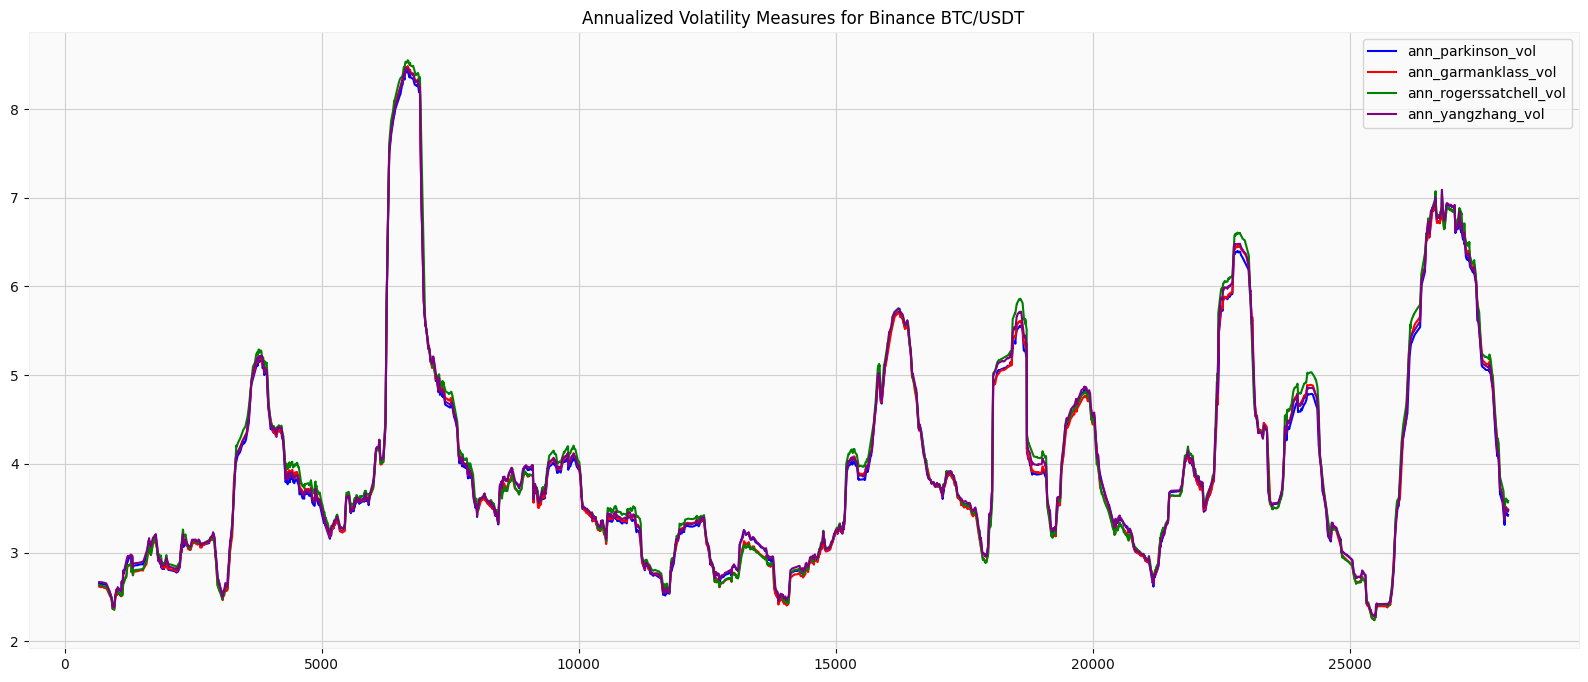

In [97]:
df_vol[['ann_parkinson_vol', 'ann_garmanklass_vol', 'ann_rogerssatchell_vol', 'ann_yangzhang_vol']].plot(figsize=(20, 8), title='Annualized Volatility Measures for Binance BTC/USDT', color=['blue', 'red', 'green', 'purple'], grid=True)

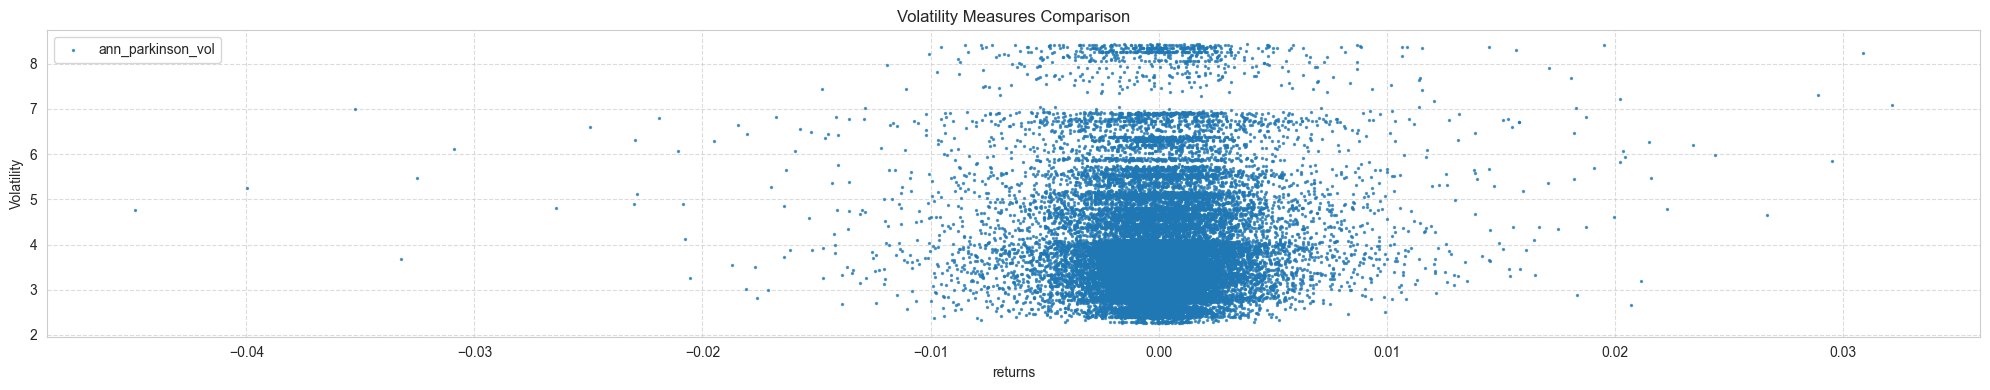

In [139]:
def plot_multi_scatterplots(df, x_column, y_columns, 
                            figsize=(20, 4), 
                            alpha=0.7,
                            marker='o',
                            colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
                            title='Volatility Measures Comparison'):
    """
    Create a single figure with multiple scatterplots using one x-axis column
    and multiple y-axis columns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data
    x_column : str
        Column name to use for x-axis
    y_columns : list
        List of column names to plot as y-axes
    figsize : tuple, optional
        Figure size (width, height) in inches
    alpha : float, optional
        Transparency of scatter points
    markers : list, optional
        List of markers to use for each y-column
    colors : list, optional
        List of colors to use for each y-column
    title : str, optional
        Title for the figure
        
    Returns:
    --------
    fig, ax : tuple
        Matplotlib figure and axis objects
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot each y-column against the x-column
    for i, y_col in enumerate(y_columns):
        # Use modulo to cycle through markers and colors if there are more y-columns than options
        marker = marker
        color = colors[i % len(colors)]
        
        # Create scatter plot
        ax.scatter(df[x_column], df[y_col], 
                   alpha=alpha,
                   marker=marker,
                   color=color,
                   label=y_col, s = 2)
    
    # Add legend, title, and labels
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel(x_column)
    ax.set_ylabel('Volatility')
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

plot_multi_scatterplots(
    df = df_vol,
    x_column='returns',
    y_columns=['ann_parkinson_vol', ]
)

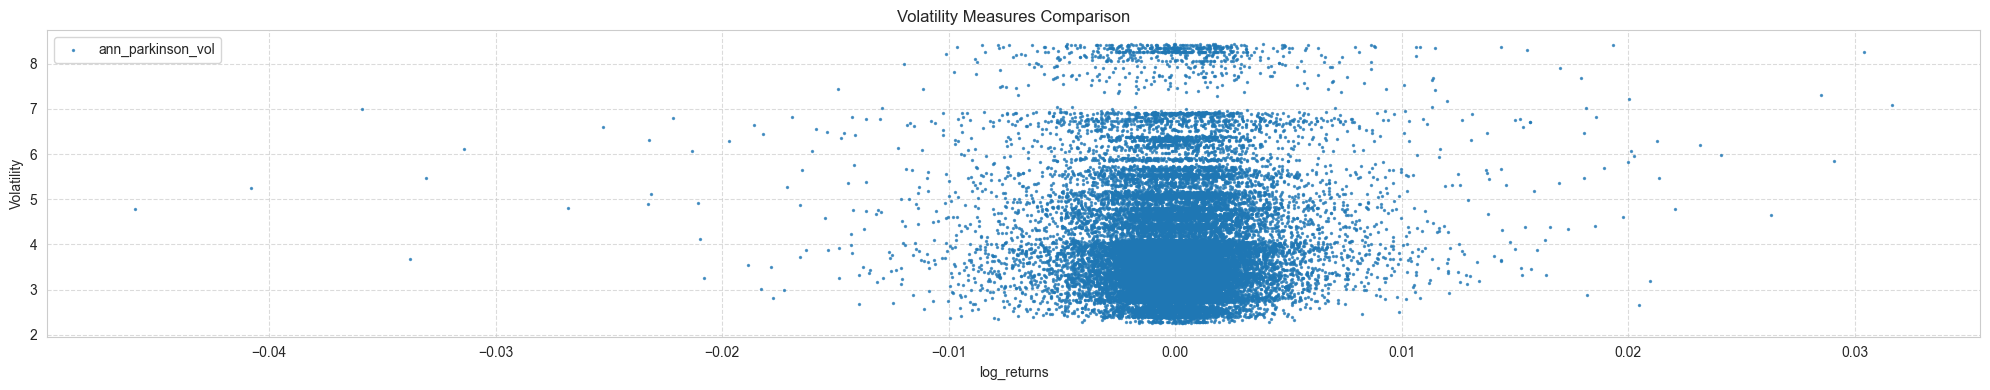

In [140]:
plot_multi_scatterplots(
    df = df_vol,
    x_column='log_returns',
    y_columns=['ann_parkinson_vol', ]
)

# 2 Volatility Estimation Models

as guided by Options, Futures, and Other Derivatives 10th edition, John C. Hull

1. EWMA
2. GARCH
3. LSTM

## Calibration of Models 

In [115]:
def volatility_ewma(volatility_series, lambda_param=0.94):
    vol = volatility_series.values if isinstance(volatility_series, pd.Series) else volatility_series
    n = len(vol)
    ewma_vol = np.full(n, np.nan)
    start_index = 0
    while start_index < n:
        # Use np.isfinite to check for valid number (not NaN, inf, -inf)
        if np.isfinite(vol[start_index]) and vol[start_index] > 0:
            break
        start_index += 1
    ewma_vol[start_index] = vol[start_index]
    # Calculate EWMA starting from the first valid value
    for t in range(start_index + 1, n):
        ewma_vol[t] = lambda_param * ewma_vol[t-1] + (1 - lambda_param) * vol[t]
    if isinstance(volatility_series, pd.Series):
        return pd.Series(ewma_vol, index=volatility_series.index)
    return ewma_vol

volatility_ewma(df_vol['ann_parkinson_vol'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
28072    3.427123
28073    3.427192
28074    3.427188
28075    3.427105
28076    3.426946
Length: 28077, dtype: float64

In [109]:
from arch import arch_model

def fit_garch(df, column_name, p=1, q=1, mean='Constant', vol='GARCH', dist='normal'):
    """
    Fits a GARCH model to a pandas DataFrame column and returns the volatility as a Series
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the data
    column_name : str
        The name of the column to model
    p : int, default 1
        The lag order for ARCH
    q : int, default 1
        The lag order for GARCH
    mean : str, default 'Constant'
        The model for the mean ('Constant', 'Zero', 'AR', 'ARX', etc.)
    vol : str, default 'GARCH'
        The volatility model ('GARCH', 'EGARCH', 'FIGARCH', etc.)
    dist : str, default 'normal'
        Error distribution assumption ('normal', 'studentst', 'skewstudent', etc.)
        
    Returns:
    --------
    pandas.Series
        The conditional volatility series with the same index as the input
    """
    # Extract the series from the dataframe
    original_series = df[column_name].copy()
    
    # Create a mask for non-NA values
    non_na_mask = ~original_series.isna()
    
    # Get the series without NA values for fitting
    clean_series = original_series[non_na_mask]
    
    # Fit the GARCH model on the clean data
    model = arch_model(clean_series, p=p, q=q, mean=mean, vol=vol, dist=dist,)
    result = model.fit(disp='off',)  # Silent fitting
    
    # Extract conditional volatility (standard deviation) for non-NA values
    clean_volatility = pd.Series(
        np.sqrt(result.conditional_volatility),
        index=clean_series.index,
        name=f"{column_name}_garch_volatility"
    )
    
    # Create a full series with all original indices, initialized with NaN
    full_volatility = pd.Series(
        np.nan,
        index=original_series.index,
        name=f"{column_name}_garch_volatility"
    )
    
    # Fill in the values for non-NA indices
    full_volatility.loc[non_na_mask] = clean_volatility
    
    return full_volatility

garch_vol = fit_garch(df_vol, column_name='ann_parkinson_vol')

# What distribution should i use for my GARCH model?
- initially very different for GARCH vs EWMA because underlying uses annualized returns / absolute returns
  - they are not normally distributed, as such, would not fit the model

In [134]:
volatility_cols = [x  for x in df_vol.columns if x.endswith('vol')]
df_vol_est = df_vol[['timestamp', 'open',] + volatility_cols].copy()
for v in volatility_cols:
    df_vol_est.loc[:,f'{v}_ewma'] = volatility_ewma(df_vol[v], lambda_param=0.99)
    df_vol_est.loc[:,f'{v}_garch'] = fit_garch(df_vol_est, column_name=v, dist='ged')
df_vol_est

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/arch/univariate/distribution.py:1192: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/arch/univariate/distribution.py:1192: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/arch/univariate/distribution.py:1192: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/arch/univariate/distribution.py:1192: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: ov

,timestamp,open,ann_parkinson_vol,ann_garmanklass_vol,ann_rogerssatchell_vol,ann_yangzhang_vol,ann_parkinson_vol_ewma,ann_parkinson_vol_garch,ann_garmanklass_vol_ewma,ann_garmanklass_vol_garch,ann_rogerssatchell_vol_ewma,ann_rogerssatchell_vol_garch,ann_yangzhang_vol_ewma,ann_yangzhang_vol_garch
0,1.717200e+12,67540.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.717201e+12,67586.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.717202e+12,67559.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.717203e+12,67603.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.717204e+12,67655.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28072,1.742465e+12,85877.28,3.415250,3.474453,3.562908,3.462551,3.652983,0.620113,3.722090,0.609341,3.816286,0.528690,3.702140,0.618724
28073,1.742466e+12,85545.89,3.428279,3.490099,3.583747,3.478607,3.650736,0.620205,3.719771,0.609397,3.813961,0.528586,3.699905,0.617898
28074,1.742467e+12,85246.35,3.427120,3.489609,3.583576,3.477492,3.648500,0.619764,3.717469,0.609237,3.811657,0.516301,3.697681,0.611511
28075,1.742468e+12,85293.90,3.425806,3.487755,3.581853,3.476409,3.646273,0.619464,3.715172,0.609117,3.809359,0.516064,3.695468,0.610225


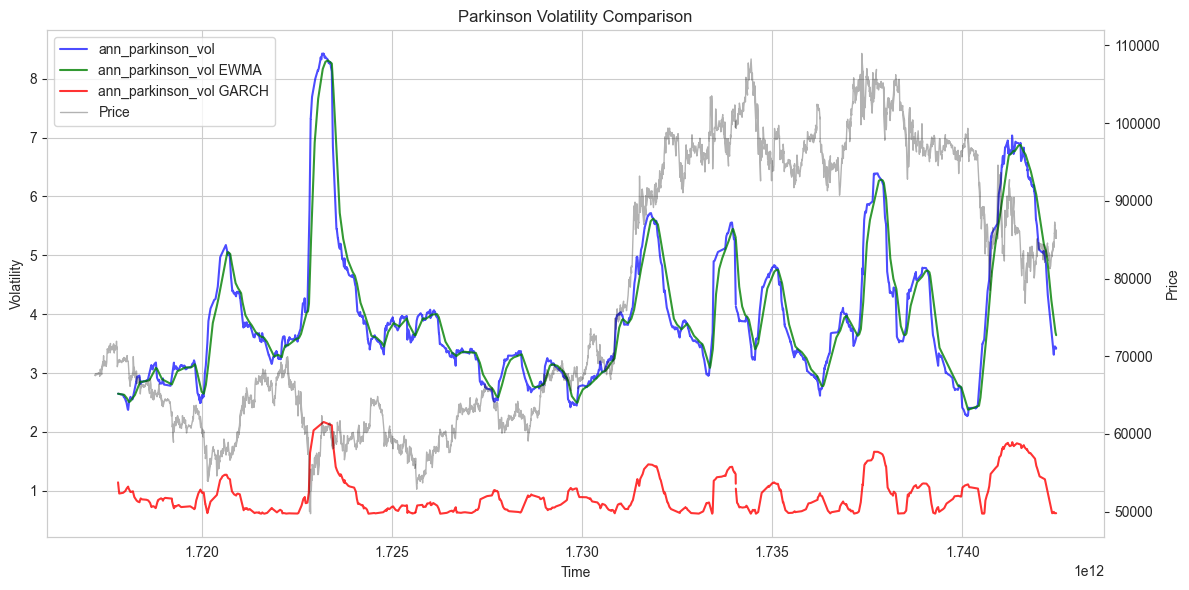

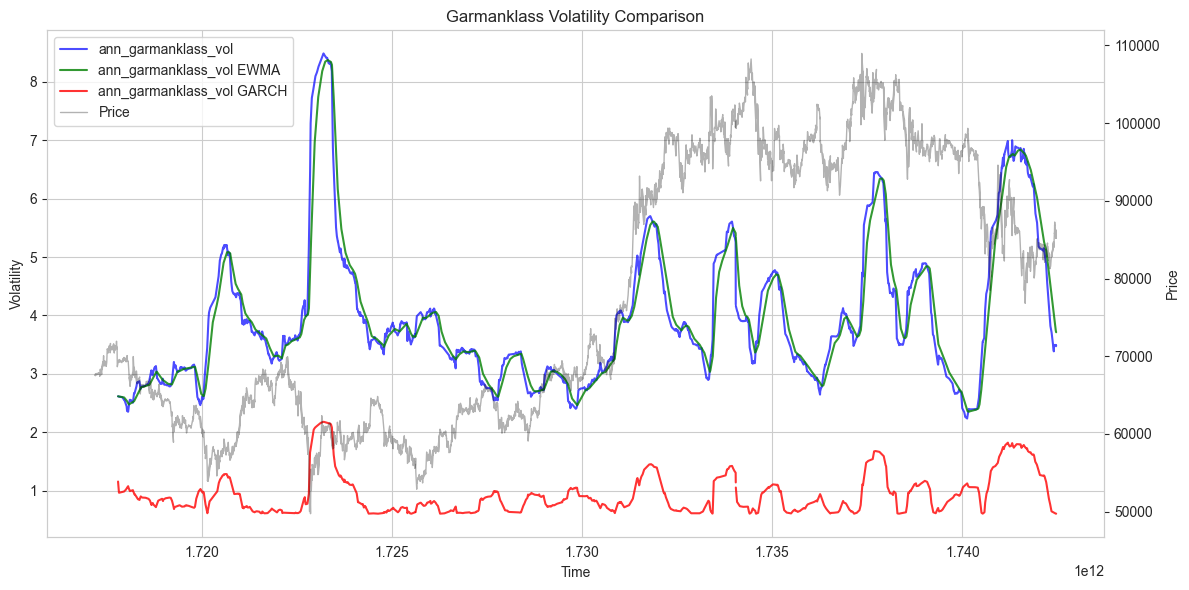

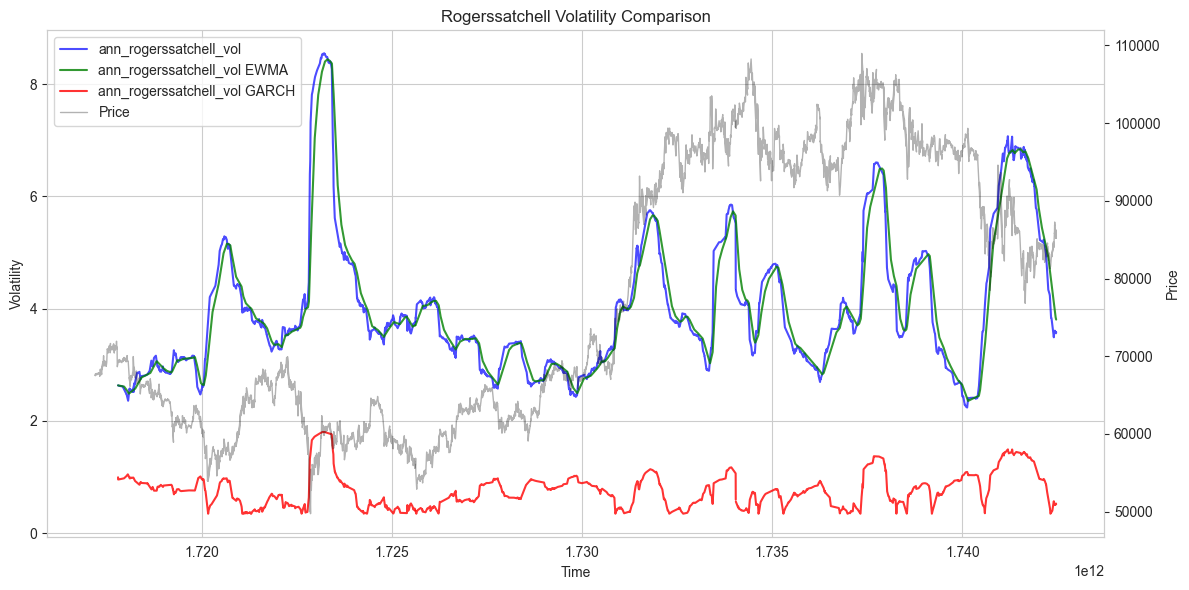

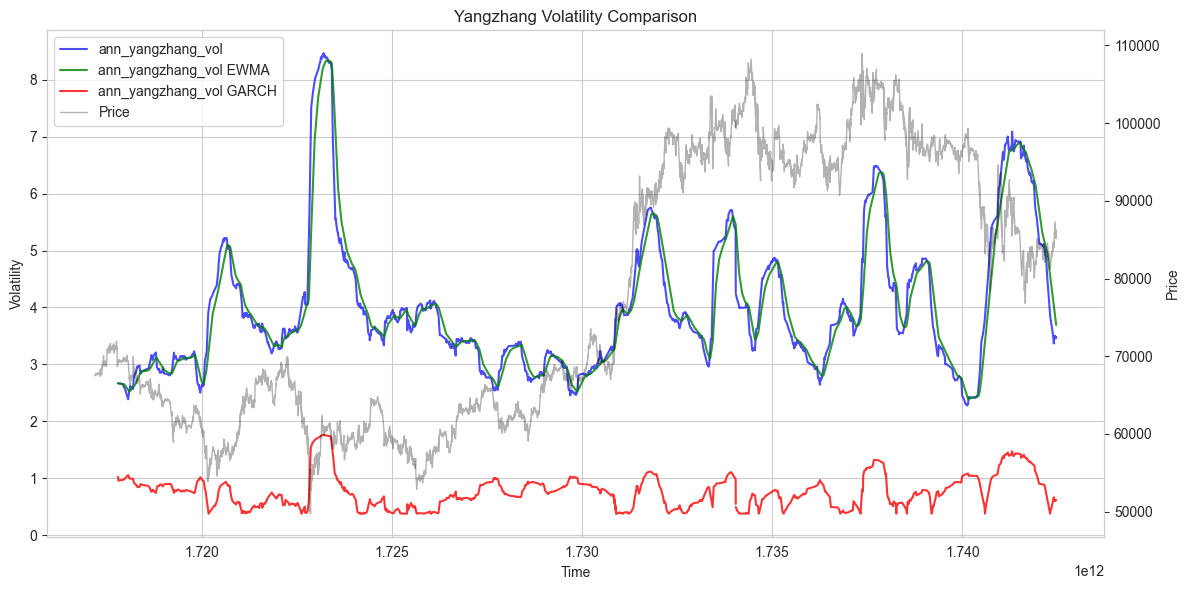

In [135]:
def plot_volatility_comparison(df, vol_type, figsize=(12, 6)):
    """
    Plot comparison of original volatility against EWMA and GARCH predictions
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with timestamp, open price, and volatility columns
    vol_type : str
        Base volatility type (e.g., 'ann_parkinson_vol')
    figsize : tuple, default (12, 6)
        Figure size
    """
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=figsize)
    
    # Format column names
    vol_ewma = f'{vol_type}_ewma'
    vol_garch = f'{vol_type}_garch'
    
    # Create secondary y-axis for price
    ax2 = ax1.twinx()
    
    # Plot volatilities on primary axis
    ax1.plot(df['timestamp'], df[vol_type], 'b-', alpha=0.7, linewidth=1.5, label=vol_type)
    ax1.plot(df['timestamp'], df[vol_ewma], 'g-', alpha=0.8, linewidth=1.5, label=f'{vol_type} EWMA')
    ax1.plot(df['timestamp'], df[vol_garch], 'r-', alpha=0.8, linewidth=1.5, label=f'{vol_type} GARCH')
    
    # Plot price on secondary axis
    ax2.plot(df['timestamp'], df['open'], 'k-', alpha=0.3, linewidth=1, label='Price')
    
    # Set labels and title
    vol_name = vol_type.replace('ann_', '').replace('_vol', '')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Volatility')
    ax2.set_ylabel('Price')
    plt.title(f'{vol_name.capitalize()} Volatility Comparison')
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    ax1.grid(visible=True)
    ax2.grid(visible=False)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Create plots for each volatility type
def create_all_volatility_plots(df):
    volatility_types = ['ann_parkinson_vol', 'ann_garmanklass_vol', 
                        'ann_rogerssatchell_vol', 'ann_yangzhang_vol']
    
    for vol_type in volatility_types:
        plot_volatility_comparison(df, vol_type)

create_all_volatility_plots(df_vol_est)

## Measurement of Models

1. EWMA
   1. $\omega = 0$
   2. $\alpha = 1 - \lambda$
   3. $\beta = \lambda$
2. GARCH(1,1)
   1. $\omega$
   2. $\alpha$
   3. $\beta$
3. LSTM
   1. 

# 